
# Bike Sharing Assignment

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

Essentially, the company wants —

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands.

# Step 1: Reading and Understanding the Data



In [2261]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2262]:
# supress warnings

import warnings
warnings.filterwarnings('ignore')

In [2263]:
bikes = pd.read_csv('day.csv')

In [2264]:
bikes.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [2265]:
#checking the shape of the dataset
bikes.shape

(730, 16)

In [2266]:
#checking for null values
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [2267]:
#getting the data types by info
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**We can see that there are no null values in any of the columns**

# Step 2:  Cleaning the data



## Identifying the target variable and removing variables which cannot contribute to our Model

* Since we are trying to find the **independent predictors** for the total number of **bookings each day**. The **'cnt'** variable is the one which captures this value according to the data dictionary. So **'cnt'** will be our target varaible.

* Also the **'registered'** and **'casual'** are just the type of users who booked on a given day which are type of **Traget Varaible**, and hence can be removed before feeding them into our model.

In [2268]:
#removing the 'registered' and 'casual' columns

bikes=bikes.drop(['registered','casual'],axis=1)

In [2269]:
#verifying if the columns have been deleted successsfully
bikes.shape

(730, 14)

In [2270]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


* Now that we got rid of 2 variables which are not siginificant for our model. Let's find out if there are any further variables which cannot be qualified as predictors/independent variables for our model.


* The variable **'instant'** seems to be just a **serial number** for each day and can be ignored.


* The variable **'dteday'** stores the date of the day. This can have important information such as which year, which month, whether it was a weekend or a holiday. However, these columns have already been given separately in the dataset. Hence, we can get rid of **'dteday'** as well

In [2271]:
#removing the 'instant' and 'dteday' columns

bikes=bikes.drop(['instant','dteday'],axis=1)
print(bikes.shape)
bikes.head()

(730, 12)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Indentifying the Categorical Variables

In [2272]:
#listing all the columns

bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

**From the data dictionary, it's clear that the following variables are categorical**


   1. **season** : season (1:spring, 2:summer, 3:fall, 4:winter)
   2. **mnth** : month ( 1 to 12)
   3. **weekday** : day of the week
   4. **weathersit** : 
            - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
            - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
            - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
            - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
            
 **We need to replace the numeric values with appropriate String Values as they are not continuous variables**


### Updating values of 'season' variable

In [2273]:
#checking the unique values in the 'season' column

bikes['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [2274]:
#replacing seasons values 1,2,3,4 with 'spring','summer','fall','winter' respectively

#creating a dictionary to map the values 

seasons = {1:'spring',2:'summer',3:'fall',4:'winter'}


In [2275]:
#updating the values in the 'season' column with season names

bikes['season'] = bikes['season'].apply(lambda x : seasons[x])

In [2276]:
#checking the values in 'season' column

bikes['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

### Updating values of 'month' variable

In [2277]:
#checking the unique values in the 'mnth' column

bikes['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [2278]:
#replacing 'mnth' values 1,2,3,4,5,6,7,8,9,10,11,12 with corresponding month names

#creating a dictionary to map the values 

months = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}


In [2279]:
#updating the values in the 'month' column with corresponding month names

bikes['mnth'] = bikes['mnth'].apply(lambda x : months[x])

In [2280]:
#checking the values in 'mnth' column

bikes['mnth'].value_counts()

Mar    62
Oct    62
May    62
Jul    62
Aug    62
Dec    62
Jan    62
Jun    60
Apr    60
Nov    60
Sep    60
Feb    56
Name: mnth, dtype: int64

### Updating values of 'weekday' variable

In [2281]:
#checking the unique values in the 'weekday' column

bikes['weekday'].value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [2282]:
#replacing 'weekday' values 0,1,2,3,4,5,6 with corresponding day names

#creating a dictionary to map the values 

weekdays = {0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}


In [2283]:
#updating the values in the 'weekday' column with corresponding day names

bikes['weekday'] = bikes['weekday'].apply(lambda x : weekdays[x])

In [2284]:
#checking the values in 'weekday' column

bikes['weekday'].value_counts()

Mon    105
Sat    105
Sun    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: weekday, dtype: int64

### Updating values of 'weathersit' variable

In [2285]:
#checking the unique values in the 'weathersit' column

bikes['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [2286]:
#replacing 'weathersit' values 1,2,3 with 'pleasant','moderate','bad' respectively

#creating a dictionary to map the values 

weather = {1:'pleasant',2:'moderate',3:'bad'}


In [2287]:
#updating the values in the 'weathersit' column with corresponding weather classes

bikes['weathersit'] = bikes['weathersit'].apply(lambda x : weather[x])

In [2288]:
#checking the values in 'weekday' column

bikes['weathersit'].value_counts()

pleasant    463
moderate    246
bad          21
Name: weathersit, dtype: int64

In [2289]:
#printing the head to check the change all at once

bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,pleasant,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,pleasant,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,pleasant,9.305237,11.46350,43.6957,12.522300,1600


# Step 3:  Visualizing the Data


Visualizing the trend among the numeric variables using seaborn pairplot


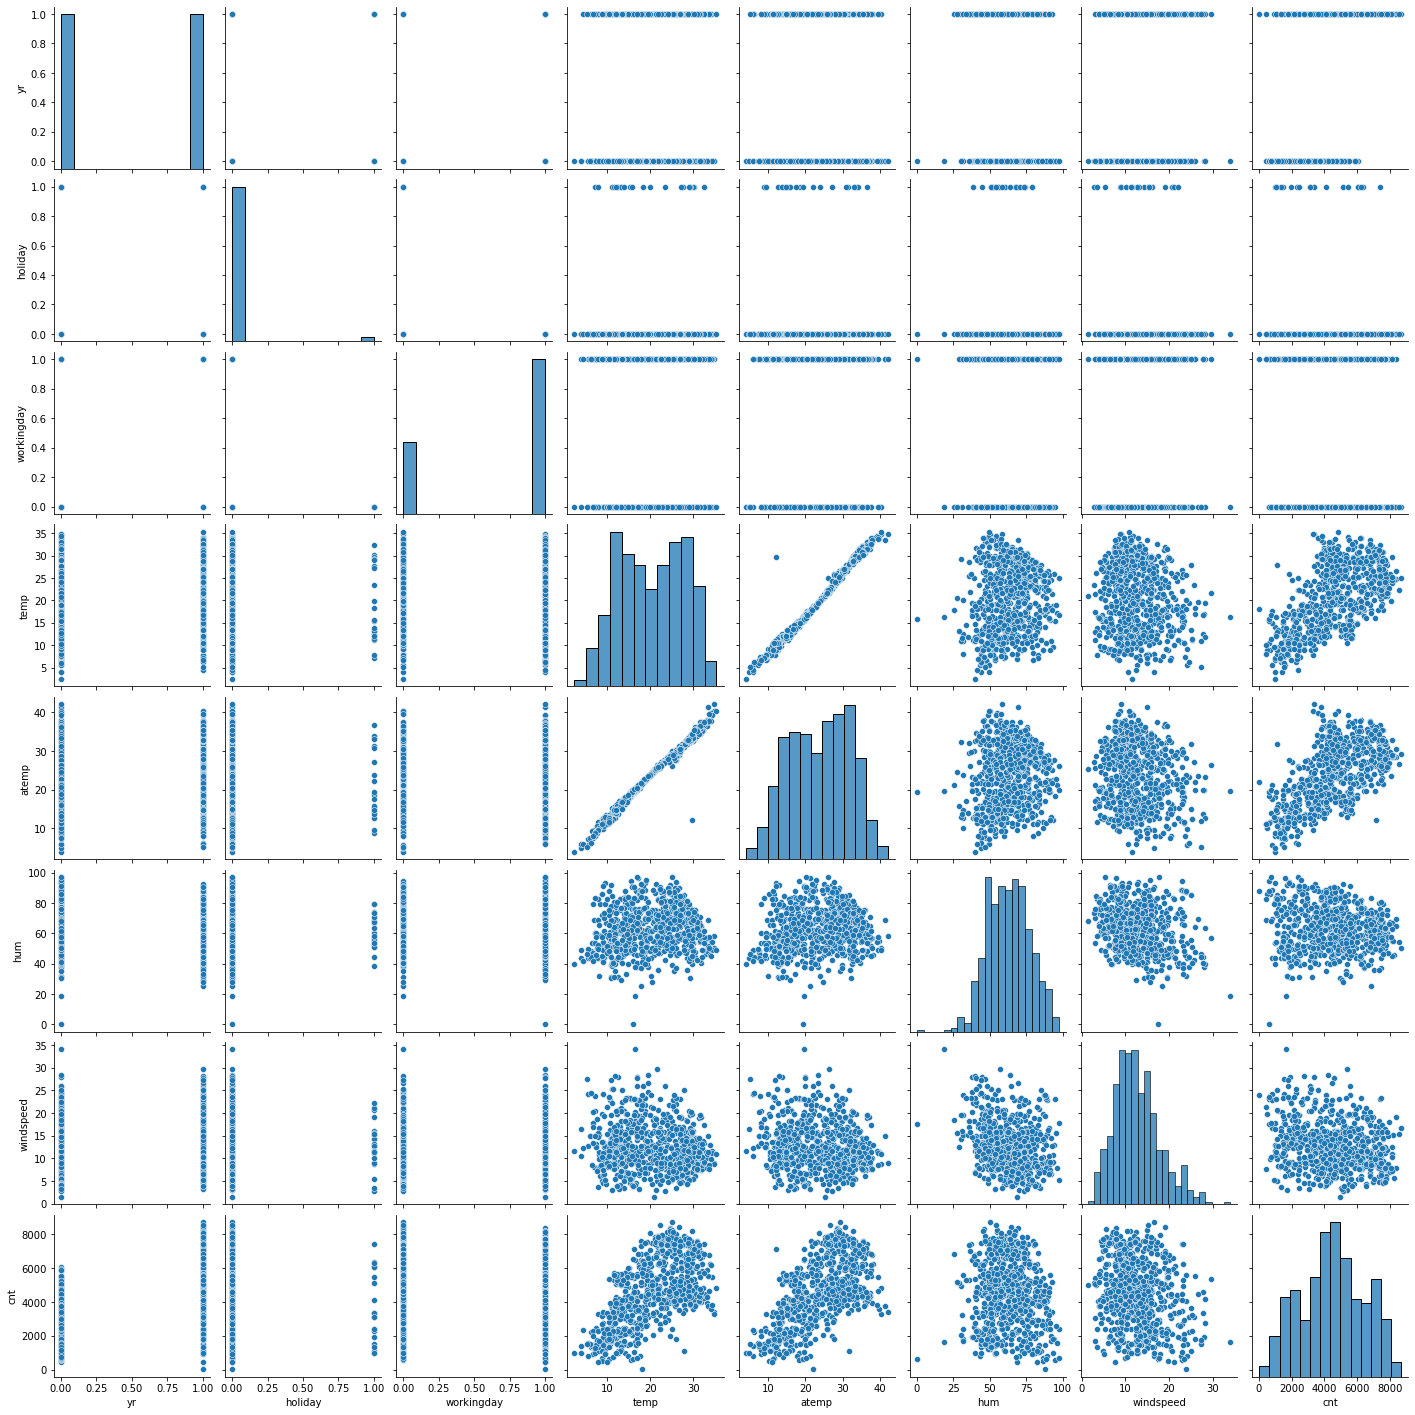

In [2290]:
sns.pairplot(bikes)
plt.show()

### Observations : 

* The **temp** and **atemp** have considerable positive correlation with **cnt**.
* There's no much linear relationship between **hum**, **windspeed** with **cnt**.
* Also, the variables **temp** and **atemp** are highly correlated as the scatter plot almost forms a straigt line. These variables together cannot be fed together into our model.


**Since** ***temp*** **and** ***atemp*** **are highly correlated and they actually reprsent actual temperature and feeling temperaute respesctively, we can get rid of temp and keep the feeling temperature to avoid multicollinearaty**

In [2291]:
#removing the temp variable from the dataset

bikes.drop(['temp'],axis=1,inplace=True)

**Visualizing Categorical Data**

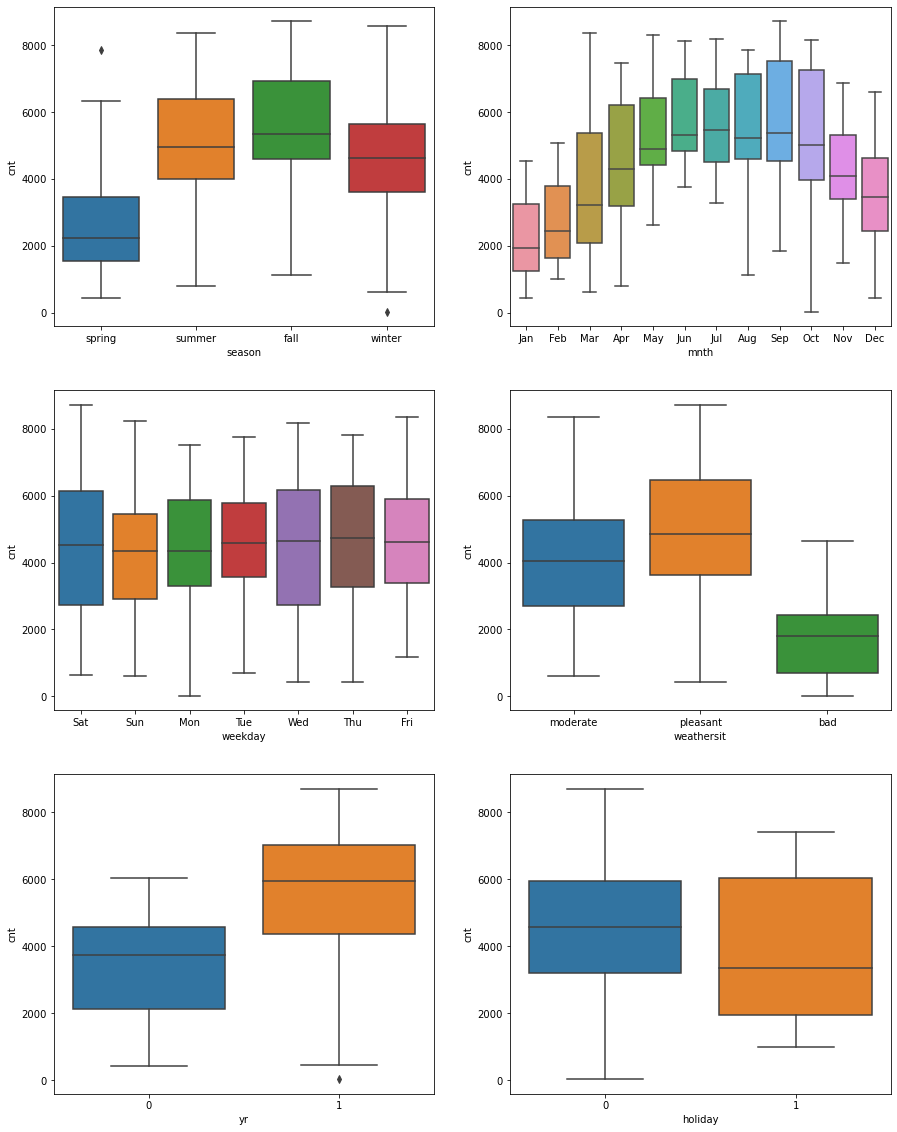

In [2292]:
plt.figure(figsize=(15, 20))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(3,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(3,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(3,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(3,2,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(3,2,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)

plt.show()

### Observations : 

* There are more number of bookings in **Fall** season, followed by **Summer** and **Winter**. The **Spring** season has not as many bookings.
* The months of **May, June, July, August, September and October** have the highest number of bookings among the months.
* There's no much affect of **weekday** on the number of bookings.
* **Pleasant** weather and **Moderate** weather are among the choices of most of the people to book a bike. Bad weather as expected has least bookings overall, but it's not 0.
* Although there's **no big difference** in the **range of bookings on holidays and non-holidays**, **Working days** have **more demand** with **minimumn bookings of 3k+** and a **median of ~4.5k.**
* The year **2019** has recorded significantly **high number of bookings** when compared to 2018.

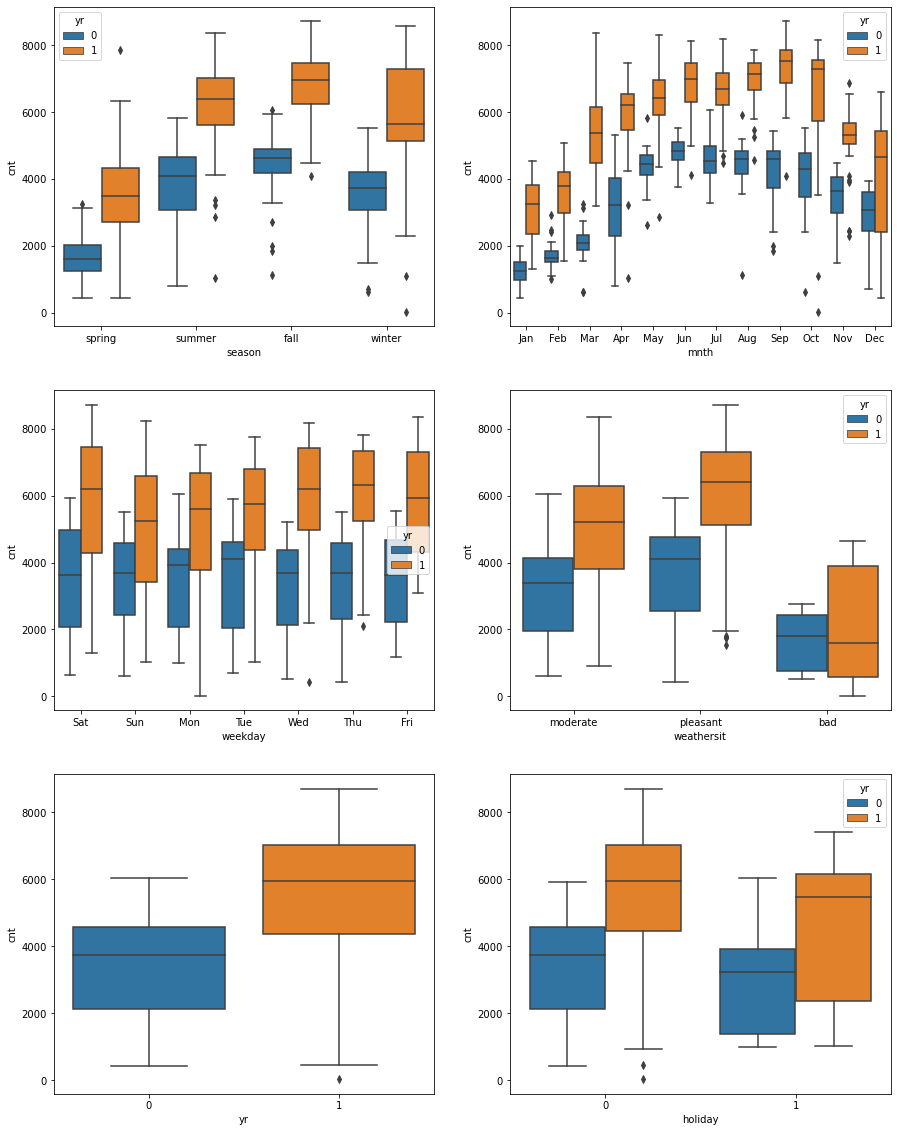

In [2293]:
# checking if the trends change across 2018 and 2019

plt.figure(figsize=(15, 20))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes,hue='yr')
plt.subplot(3,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes,hue='yr')
plt.subplot(3,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes,hue='yr')
plt.subplot(3,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes,hue='yr')
plt.subplot(3,2,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(3,2,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes,hue='yr')

plt.show()

### Observations :

* There's no big difference when comparing different attributes across 2 different years. The year 2018 has got still less number of bookings as we saw above.


# Step 4: Data Preparation

* There are **categorical variables** in our dataset which need to be converted to **numerical values** to fit a regression line.
* Let's convert them into 0s and 1s.

    NOTE : The categorical variables with just **2 categories can be converted into 0s and 1s**. However, those with **more than 2 categories** need to be converted into **dummy variables**.

In [2294]:
#listing all the columns

bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [2295]:
# categorical variables with just 2 categories

bikes[['yr','holiday','workingday']]

,yr,holiday,workingday
0,0,0,0
1,0,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
725,1,0,1
726,1,0,1
727,1,0,0
728,1,0,0


In [2296]:
#printing the unique values in these columns
print(bikes.yr.value_counts())
print(bikes.holiday.value_counts())
print(bikes.workingday.value_counts())

1    365
0    365
Name: yr, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
1    499
0    231
Name: workingday, dtype: int64


**Since all the categorical variables with just 2 categories already have 0s and 1s, we can proceed as is.**


In [2297]:
# categorical variables with more than 2 categories

bikes[['season','weekday','mnth','weathersit']]

,season,weekday,mnth,weathersit
0,spring,Sat,Jan,moderate
1,spring,Sun,Jan,moderate
2,spring,Mon,Jan,pleasant
3,spring,Tue,Jan,pleasant
4,spring,Wed,Jan,pleasant
...,...,...,...,...
725,spring,Thu,Dec,moderate
726,spring,Fri,Dec,moderate
727,spring,Sat,Dec,moderate
728,spring,Sun,Dec,pleasant


In [2298]:
#printing the unique values in these columns
print(bikes.season.value_counts())
print(bikes.weekday.value_counts())
print(bikes.mnth.value_counts())
print(bikes.weathersit.value_counts())

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
Mon    105
Sat    105
Sun    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: weekday, dtype: int64
Mar    62
Oct    62
May    62
Jul    62
Aug    62
Dec    62
Jan    62
Jun    60
Apr    60
Nov    60
Sep    60
Feb    56
Name: mnth, dtype: int64
pleasant    463
moderate    246
bad          21
Name: weathersit, dtype: int64


### Creating Dummy Variables

#### 1. season

 ### **We are not dropping the first column as this data is not used for predicting some value but for interpretation**

In [2299]:
#creating dummy variables for 'season' and storing in a new dataframe 

SEASON = pd.get_dummies(bikes['season'])

In [2300]:
#checking a sample of the data

SEASON.sample(10)

,fall,spring,summer,winter
319,0,0,0,1
365,0,1,0,0
152,0,0,1,0
117,0,0,1,0
136,0,0,1,0
647,0,0,0,1
495,0,0,1,0
462,0,0,1,0
174,1,0,0,0
265,0,0,0,1


* 1000 - represents **fall**
* 0100 - represents **spring**
* 0010 - represents **summer**
* 0001 - represents **winter**

**Concatenating the main dataframe and the SEASON dataframe**

In [2301]:
bikes = pd.concat([bikes,SEASON],axis=1)

In [2302]:
#getting a random sample from bikes to check if the dummy variables show the correct data
bikes.sample(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,fall,spring,summer,winter
450,summer,1,Mar,0,Tue,1,pleasant,15.78270,29.0000,12.541864,5102,0,0,1,0
623,fall,1,Sep,0,Sun,0,pleasant,28.15625,57.0000,6.042281,7333,1,0,0,0
3,spring,0,Jan,0,Tue,1,pleasant,10.60610,59.0435,10.739832,1562,0,1,0,0
426,spring,1,Mar,0,Sat,0,moderate,20.67460,62.1250,10.792293,4066,0,1,0,0
354,spring,0,Dec,0,Wed,1,moderate,21.40085,85.8333,14.833800,2660,0,1,0,0
175,fall,0,Jun,0,Sat,0,pleasant,32.16565,48.3333,14.041257,5202,1,0,0,0
656,winter,1,Oct,0,Fri,1,moderate,26.89480,81.5000,9.041918,5424,0,0,0,1
644,winter,1,Oct,0,Sun,0,moderate,20.99065,70.8333,9.457854,3510,0,0,0,1
11,spring,0,Jan,0,Wed,1,pleasant,8.02365,59.9545,20.410009,1162,0,1,0,0
658,winter,1,Oct,0,Sun,0,pleasant,22.82145,51.0000,11.125618,6824,0,0,0,1


In [2303]:
#dropping the season column which is categorical as we have created the dummy variables successfully

bikes.drop(['season'],axis=1,inplace=True)

In [2304]:
bikes.head()

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,fall,spring,summer,winter
0,0,Jan,0,Sat,0,moderate,18.18125,80.5833,10.749882,985,0,1,0,0
1,0,Jan,0,Sun,0,moderate,17.68695,69.6087,16.652113,801,0,1,0,0
2,0,Jan,0,Mon,1,pleasant,9.47025,43.7273,16.636703,1349,0,1,0,0
3,0,Jan,0,Tue,1,pleasant,10.60610,59.0435,10.739832,1562,0,1,0,0
4,0,Jan,0,Wed,1,pleasant,11.46350,43.6957,12.522300,1600,0,1,0,0


In [2305]:
#checking the shape of the data
bikes.shape

(730, 14)

#### 2. weekday

In [2306]:
#creating dummy variables for 'weekday' and storing in a new dataframe 

WEEKDAY = pd.get_dummies(bikes['weekday'])

In [2307]:
#checking a sample of the data

WEEKDAY.sample(10)

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
170,0,1,0,0,0,0,0
570,0,0,0,0,0,0,1
365,0,0,0,1,0,0,0
431,0,0,0,0,1,0,0
518,0,0,0,1,0,0,0
210,0,0,1,0,0,0,0
387,0,1,0,0,0,0,0
182,0,0,1,0,0,0,0
541,0,0,0,0,0,1,0
478,0,0,0,0,0,1,0


**Concatenating the main dataframe and the WEEKDAY dataframe**

In [2308]:
bikes = pd.concat([bikes,WEEKDAY],axis=1)

In [2309]:
#getting a random sample from bikes to check if the dummy variables show the correct data
bikes.sample(10)

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,...,spring,summer,winter,Fri,Mon,Sat,Sun,Thu,Tue,Wed
645,1,Oct,1,Mon,0,moderate,19.38040,70.9583,12.708493,5478,...,0,0,1,0,1,0,0,0,0,0
8,0,Jan,0,Sun,0,pleasant,5.80875,43.4167,24.250650,822,...,1,0,0,0,0,0,1,0,0,0
450,1,Mar,0,Tue,1,pleasant,15.78270,29.0000,12.541864,5102,...,0,1,0,0,0,0,0,0,1,0
270,0,Sep,0,Wed,1,moderate,28.75790,84.8750,9.958143,3907,...,0,0,1,0,0,0,0,0,0,1
347,0,Dec,0,Wed,1,moderate,16.91810,66.3750,4.084206,3740,...,0,0,1,0,0,0,0,0,0,1
7,0,Jan,0,Sat,0,moderate,8.11270,53.5833,17.875868,959,...,1,0,0,0,0,1,0,0,0,0
566,1,Jul,0,Sat,0,bad,27.49560,86.5417,14.291100,4459,...,0,0,0,0,0,1,0,0,0,0
545,1,Jun,0,Sat,0,pleasant,34.37540,60.1250,10.791757,5687,...,0,0,0,0,0,1,0,0,0,0
310,0,Nov,0,Mon,1,pleasant,20.04355,75.8750,3.834075,4035,...,0,0,1,0,1,0,0,0,0,0
294,0,Oct,0,Sat,0,pleasant,21.27460,62.9167,6.208669,4308,...,0,0,1,0,0,1,0,0,0,0


In [2310]:
#dropping the weekday column which is categorical as we have created the dummy variables successfully

bikes.drop(['weekday'],axis=1,inplace=True)

In [2311]:
bikes.head()

,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,fall,spring,summer,winter,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,Jan,0,0,moderate,18.18125,80.5833,10.749882,985,0,1,0,0,0,0,1,0,0,0,0
1,0,Jan,0,0,moderate,17.68695,69.6087,16.652113,801,0,1,0,0,0,0,0,1,0,0,0
2,0,Jan,0,1,pleasant,9.47025,43.7273,16.636703,1349,0,1,0,0,0,1,0,0,0,0,0
3,0,Jan,0,1,pleasant,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,0,0,0,1,0
4,0,Jan,0,1,pleasant,11.46350,43.6957,12.522300,1600,0,1,0,0,0,0,0,0,0,0,1


In [2312]:
#checking the shape of the data
bikes.shape

(730, 20)

#### 3. month

In [2313]:
#creating dummy variables for 'mnth' and storing in a new dataframe 

MONTH = pd.get_dummies(bikes['mnth'])

In [2314]:
#checking a sample of the data

MONTH.sample(10)

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
633,0,0,0,0,0,0,0,0,0,0,0,1
354,0,0,1,0,0,0,0,0,0,0,0,0
624,0,0,0,0,0,0,0,0,0,0,0,1
530,0,0,0,0,0,0,1,0,0,0,0,0
359,0,0,1,0,0,0,0,0,0,0,0,0
68,0,0,0,0,0,0,0,1,0,0,0,0
383,0,0,0,0,1,0,0,0,0,0,0,0
198,0,0,0,0,0,1,0,0,0,0,0,0
202,0,0,0,0,0,1,0,0,0,0,0,0
655,0,0,0,0,0,0,0,0,0,0,1,0


**Concatenating the main dataframe and the MONTH dataframe**

In [2315]:
bikes = pd.concat([bikes,MONTH],axis=1)

In [2316]:
#getting a random sample from bikes to check if the dummy variables show the correct data
bikes.sample(10)

,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,fall,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
64,0,Mar,0,0,moderate,18.31260,94.8261,23.000229,605,0,...,0,0,0,0,0,1,0,0,0,0
412,1,Feb,0,1,pleasant,17.58145,63.4583,13.791682,4154,0,...,0,1,0,0,0,0,0,0,0,0
73,0,Mar,0,1,moderate,15.90890,65.5652,12.348703,2056,0,...,0,0,0,0,0,1,0,0,0,0
662,1,Oct,0,1,moderate,26.48440,80.0417,8.333125,7359,0,...,0,0,0,0,0,0,0,0,1,0
88,0,Mar,0,1,moderate,14.86750,64.6667,11.583496,1536,0,...,0,0,0,0,0,1,0,0,0,0
464,1,Apr,0,1,pleasant,21.81165,43.5000,16.708125,5918,0,...,0,0,0,0,0,0,0,0,0,0
617,1,Sep,0,1,pleasant,28.28270,50.3750,17.333771,7525,1,...,0,0,0,0,0,0,0,0,0,1
155,0,Jun,0,0,moderate,30.84020,65.2500,9.292364,4906,0,...,0,0,0,0,1,0,0,0,0,0
164,0,Jun,0,1,pleasant,29.57730,50.7083,18.041961,4891,0,...,0,0,0,0,1,0,0,0,0,0
129,0,May,0,1,pleasant,26.13605,48.9167,7.749957,4803,0,...,0,0,0,0,0,0,1,0,0,0


In [2317]:
#dropping the mnth column which is categorical as we have created the dummy variables successfully

bikes.drop(['mnth'],axis=1,inplace=True)

In [2318]:
bikes.head()

,yr,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,fall,spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,moderate,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,moderate,17.68695,69.6087,16.652113,801,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,pleasant,9.47025,43.7273,16.636703,1349,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,pleasant,10.60610,59.0435,10.739832,1562,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,pleasant,11.46350,43.6957,12.522300,1600,0,1,...,0,0,1,0,0,0,0,0,0,0


In [2319]:
#checking the shape of the data
bikes.shape

(730, 31)

#### 4. weathersit

In [2320]:
#creating dummy variables for 'weathersit' and storing in a new dataframe 

WEATHER = pd.get_dummies(bikes['weathersit'])

In [2321]:
#checking a sample of the data

WEATHER.sample(15)

,bad,moderate,pleasant
594,0,0,1
128,0,0,1
292,0,0,1
621,0,0,1
21,0,0,1
641,0,1,0
504,0,0,1
628,0,0,1
727,0,1,0
695,0,1,0


**Concatenating the main dataframe and the WEATHER dataframe**

In [2322]:
bikes = pd.concat([bikes,WEATHER],axis=1)

In [2323]:
#getting a random sample from bikes to check if the dummy variables show the correct data
bikes.sample(10)

,yr,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,fall,spring,...,Jul,Jun,Mar,May,Nov,Oct,Sep,bad,moderate,pleasant
567,1,0,0,moderate,31.15625,76.2500,6.292694,7410,1,0,...,1,0,0,0,0,0,0,0,1,0
701,1,0,1,pleasant,22.78980,76.7500,5.542294,6234,0,0,...,0,0,0,0,0,0,0,0,0,1
95,0,0,1,pleasant,19.38040,47.0833,17.625221,2808,0,0,...,0,0,0,0,0,0,0,0,0,1
107,0,0,1,pleasant,25.15730,54.2500,10.958989,3429,0,0,...,0,0,0,0,0,0,0,0,0,1
191,0,0,1,pleasant,36.49020,63.5833,18.916579,4086,1,0,...,1,0,0,0,0,0,0,0,0,1
611,1,0,1,pleasant,34.34440,75.5000,15.833507,6864,1,0,...,0,0,0,0,0,0,1,0,0,1
7,0,0,0,moderate,8.11270,53.5833,17.875868,959,0,1,...,0,0,0,0,0,0,0,0,1,0
622,1,0,0,pleasant,29.29335,50.1667,16.583907,8714,1,0,...,0,0,0,0,0,0,1,0,0,1
317,0,0,1,pleasant,26.23060,58.7083,20.541932,4486,0,0,...,0,0,0,0,1,0,0,0,0,1
413,1,0,0,pleasant,17.77125,53.4583,12.792243,4318,0,1,...,0,0,0,0,0,0,0,0,0,1


In [2324]:
#dropping the mnth column which is categorical as we have created the dummy variables successfully

bikes.drop(['weathersit'],axis=1,inplace=True)

In [2325]:
bikes.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,fall,spring,summer,...,Jul,Jun,Mar,May,Nov,Oct,Sep,bad,moderate,pleasant
0,0,0,0,18.18125,80.5833,10.749882,985,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,10.60610,59.0435,10.739832,1562,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,11.46350,43.6957,12.522300,1600,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [2326]:
#checking the shape of the data
bikes.shape

(730, 33)

In [2327]:
# printing the info of the data to check the datatypes

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   atemp       730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   fall        730 non-null    uint8  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  Fri         730 non-null    uint8  
 12  Mon         730 non-null    uint8  
 13  Sat         730 non-null    uint8  
 14  Sun         730 non-null    uint8  
 15  Thu         730 non-null    uint8  
 16  Tue         730 non-null    uint8  
 17  Wed         730 non-null    uint8  
 18  Apr         730 non-null    uint8  
 19  Aug         730 non-null    u

**We finally got 34 columns and all are of type integer or float**

# Step 5: Splitting the Data into Training and Testing Sets



In [2328]:
#randomly splitting the data into test and train set with 70% of training data and 30% of test data

df_train, df_test = train_test_split(bikes, train_size = 0.7, random_state=100)

In [2329]:
#checkinf if the data has been split as expected
df_train.shape

(510, 33)

In [2330]:
df_test.shape

(220, 33)

### Rescaling the variables for better Interpretation and Efficient Model Fitting

#### Mix-Max Scaling

In [2331]:
# creating a MinMaxScaler object 
scaler = MinMaxScaler()

In [2332]:
#revisiting the columns
df_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'fall', 'spring', 'summer', 'winter', 'Fri', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'bad', 'moderate', 'pleasant'],
      dtype='object')

In [2333]:
# Applying scaler to all the columns in the 'Train Data' except for 
#'yes-no' and 'dummy' types as they are already within the range of 0 and 1 inclusive

#capturing the numeric variables from 34 variables
numeric_vars = ['atemp','hum','windspeed','cnt']

df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])

df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,fall,spring,summer,...,Jul,Jun,Mar,May,Nov,Oct,Sep,bad,moderate,pleasant
576,1,0,1,0.766351,0.725633,0.264686,0.827658,1,0,0,...,1,0,0,0,0,0,0,0,0,1
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,1,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,0,1,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,0,1,...,0,0,0,0,0,0,0,0,1,0
111,0,0,1,0.318819,0.751824,0.380981,0.191095,0,0,1,...,0,0,0,0,0,0,0,0,1,0


**We can see that we have successfully scaled all the variables between 0 and 1 inclusive**

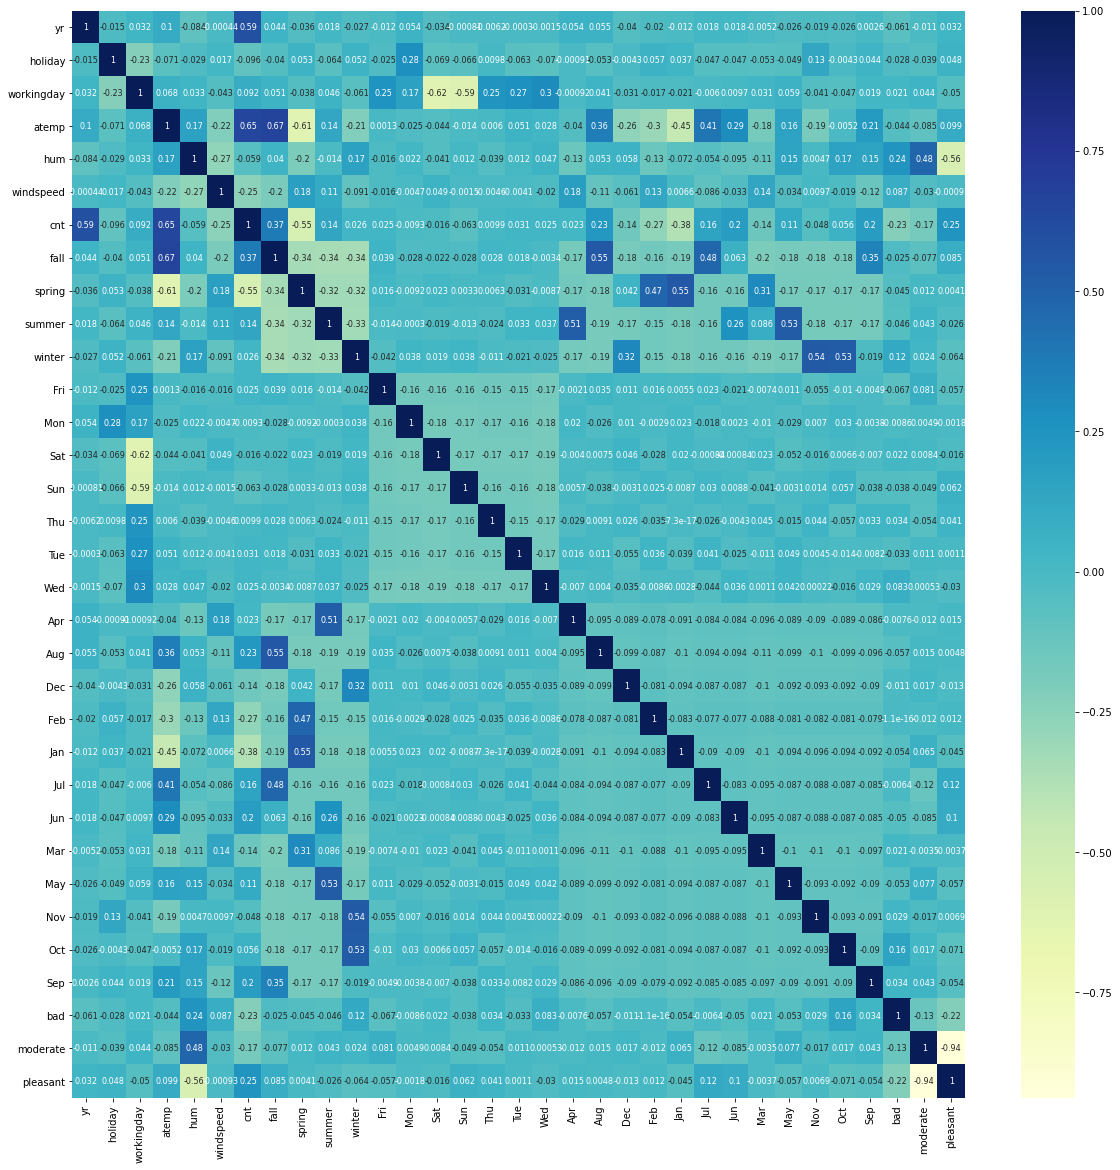

In [2334]:
#checking the correlation amongst all the variables by using heatmap

plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu",annot_kws={"fontsize":8})
plt.show()

### Observations :

* Let's first check the correlation of other variables with target variable 'cnt':
 1. It has good **positive correlation with 'pleasant'** as people prefer pleasant weather to go out.
      
 2. It has good **negative correlation wtth 'bad'** weather as people don not prefer bad weather when going out.
      
 3. It has good **positive correlation with 'June','July','August','September','October' months** as it is end of summer and start of fall season.
      
 4. It has **highest positive correlation with temparature and year**, as people are more preferring to go out in warm temperatues and also the year 2019 has more bookings as we saw in previous analysis.
      
 5. It has highest negative correlation with **spring** as people aren't preferring this due to bad weather.
 
 
* Looking at the correlations amongst the **independent variables**, we can see some obvious correlations:

 1. There is high correlation between the months and seasons like **Jan,Feb with Spring** or **May and Summer** as they the same time of the year.
 2. There's a high **negative correlation between Jan and Temperature** as they temperatures in January are usually less.
 3. **High positive correlation between Fall and temparature** as Fall has higher temperatures.
 
**These correlations suggest that having both of the correlated variables will make the model with high Variannce Inflation which would lead to bad model. Hence none of the hightly correlated independent variables should co-exist in our model which we can verify just for our verification.**

### Dividing the Train Set into X and Y 

In [2335]:
# Popping the target variable from the train set and assigning it to y_train,
# Assigning the remianing dataset to X_train as we will work with all the variables assuming all are predictors.

y_train = df_train.pop('cnt')
X_train = df_train

In [2336]:
y_train = pd.DataFrame(y_train)
y_train.shape

(510, 1)

# Step 6: Model Building using RFE



In [2337]:
# Running RFE with the output number of the variables 15 since we have 34 in total

#creating a LinearRegression object
lm = LinearRegression()

#fitting the model
lm.fit(X_train,y_train)

#using rfe and specifying number of siginificant variables
rfe = RFE(lm,15)

#fittng the rfe model
rfe = rfe.fit(X_train,y_train)

In [2338]:
#listing all the varibles with their rank and whether RFE picked them as one among top 15
sorted(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))

[('Apr', False, 13),
 ('Aug', True, 1),
 ('Dec', False, 7),
 ('Feb', False, 6),
 ('Fri', False, 9),
 ('Jan', False, 3),
 ('Jul', False, 15),
 ('Jun', False, 5),
 ('Mar', False, 18),
 ('May', False, 4),
 ('Mon', False, 11),
 ('Nov', False, 17),
 ('Oct', True, 1),
 ('Sat', True, 1),
 ('Sep', True, 1),
 ('Sun', False, 10),
 ('Thu', False, 14),
 ('Tue', False, 12),
 ('Wed', False, 16),
 ('atemp', True, 1),
 ('bad', True, 1),
 ('fall', False, 8),
 ('holiday', True, 1),
 ('hum', True, 1),
 ('moderate', False, 2),
 ('pleasant', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('windspeed', True, 1),
 ('winter', True, 1),
 ('workingday', True, 1),
 ('yr', True, 1)]

In [2339]:
#preserving the columns picked by rfe
significant = X_train.columns[rfe.support_]
significant

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Sat', 'Aug', 'Oct', 'Sep', 'bad', 'pleasant'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [2340]:
# Creating X_train dataframe with RFE significant variables

X_train_rfe = X_train[significant]

In [2341]:
# Adding a constant variable from statsmodel api

X_train_rfe = sm.add_constant(X_train_rfe)

In [2342]:
X_train_rfe.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Sat,Aug,Oct,Sep,bad,pleasant
576,1.0,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,1
426,1.0,1,0,0,0.438975,0.640189,0.255342,1,0,0,1,0,0,0,0,0
728,1.0,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,0,1
482,1.0,1,0,0,0.391735,0.504508,0.188475,0,1,0,1,0,0,0,0,0
111,1.0,0,0,1,0.318819,0.751824,0.380981,0,1,0,0,0,0,0,0,0


In [2343]:
#creating an ordinary leas squares object with the training data
lm = sm.OLS(y_train,X_train_rfe)

#fitting the model
model = lm.fit()

In [2344]:
#printing the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.6
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          2.07e-188
Time:                        20:03:44   Log-Likelihood:                 513.22
No. Observations:                 510   AIC:                            -994.4
Df Residuals:                     494   BIC:                            -926.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1850      0.040      4.621      0.000       0.106       0.264
yr             0.2314      0.008     28.583      0.000       0.216       0.247
holiday       -0.0505      0.027     -1.853      0.064      -0.104       0.003
workingday     0.0448      0.012      3.840      0.000       0.022       0.068
atemp          0.4934      0.035     14.229      0.000       0.425       0.561
hum           -0.1629      0.038     -4.311      0.000      -0.237      -0.089
windspeed     -0.1644      0.026     -6.394      0.000      -0.215      -0.114
spring        -0.0497      0.021     -2.314      0.021      -0.092      -0.008
summer         0.0759      0.016      4.781      0.000       0.045       0.107
winter         0.0937      0.019      4.837      0.000       0.056       0.132
Sat            0.0532      0.015      3.621      0.000       0.024       0.082
Aug            0.0536      0.018      3.056      0.002       0.019       0.088
Oct            0.0441      0.018      2.506      0.013       0.010       0.079
Sep            0.1163      0.017      6.717      0.000       0.082       0.150
bad           -0.1883      0.025     -7.495      0.000      -0.238      -0.139
pleasant       0.0587      0.010      5.590      0.000       0.038       0.079
==============================================================================
Omnibus:                       73.976   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.858
Skew:                          -0.687   Prob(JB):                     4.93e-48
Kurtosis:                       5.892   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2345]:
#calculating the VIFs to check if there's some varible with very high VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,101.25
7,spring,5.37
9,winter,4.41
4,atemp,3.42
8,summer,2.96
5,hum,1.91
3,workingday,1.88
10,Sat,1.79
11,Aug,1.69
15,pleasant,1.63


### <font color='red'>NOTE : We can ignore the hight VIF for constant variable as it doesn't affect our model</font>

### Observations : 

* The mode's R and R-squared values are ~84% which is quite good.
* The prob(F-statistics) is also very low indicating that this is a good model.
* Among the P-values of various coefficients, **Holiday** has a p-value higher than the acceptable value.
* Also we have a variable **spring** with high VIF value (5.37) which is greater than 5.

**Since we first remove the variable with high P-value first and see if there's a change in the VIFs, let's remove
***holiday*** **and fit the model on the remaining data**

In [2346]:
#remvoing the variable 'holiday' from the training set
X_train_rfe.drop(['holiday'],axis=1,inplace=True)

In [2347]:
#fitting the model on the dataset with remaining fields
lm = sm.OLS(y_train,X_train_rfe)
model = lm.fit()

In [2348]:
#printing the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.2
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          8.09e-189
Time:                        20:03:44   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     495   BIC:                            -929.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1775      0.040      4.445      0.000       0.099       0.256
yr             0.2316      0.008     28.537      0.000       0.216       0.248
workingday     0.0523      0.011      4.769      0.000       0.031       0.074
atemp          0.4938      0.035     14.208      0.000       0.426       0.562
hum           -0.1619      0.038     -4.273      0.000      -0.236      -0.087
windspeed     -0.1649      0.026     -6.402      0.000      -0.216      -0.114
spring        -0.0508      0.022     -2.359      0.019      -0.093      -0.009
summer         0.0759      0.016      4.771      0.000       0.045       0.107
winter         0.0923      0.019      4.755      0.000       0.054       0.130
Sat            0.0608      0.014      4.300      0.000       0.033       0.089
Aug            0.0535      0.018      3.045      0.002       0.019       0.088
Oct            0.0453      0.018      2.570      0.010       0.011       0.080
Sep            0.1144      0.017      6.602      0.000       0.080       0.148
bad           -0.1879      0.025     -7.463      0.000      -0.237      -0.138
pleasant       0.0584      0.011      5.554      0.000       0.038       0.079
==============================================================================
Omnibus:                       79.190   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.229
Skew:                          -0.725   Prob(JB):                     4.15e-53
Kurtosis:                       6.041   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2349]:
#calculating the VIFs to check if there's some varibal with very high VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,100.20
6,spring,5.37
8,winter,4.40
3,atemp,3.42
7,summer,2.96
4,hum,1.91
10,Aug,1.69
2,workingday,1.66
9,Sat,1.65
14,pleasant,1.63


### Observations : 

* The mode's R and R-squared values are still around ~83% which hasn't changed much.
* The prob(F-statistics) is also very low indicating that this is a good model.
* Among the P-values of various coefficients, **all the values are below 0.05** which is the desired result.
* However the variable **spring** still remains with high VIF value (5.37) which is greater than 5.

**We need to now remove the** ***spring*** **variable as it can be pretty well defined by the remaining variables**

In [2350]:
#remvoing the variable 'spring' from the training set
X_train_rfe.drop(['spring'],axis=1,inplace=True)

In [2351]:
#fitting the model on the dataset with remaining fields
lm = sm.OLS(y_train,X_train_rfe)
model = lm.fit()

In [2352]:
#printing the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          8.76e-189
Time:                        20:03:44   Log-Likelihood:                 508.60
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1271      0.034      3.749      0.000       0.061       0.194
yr             0.2302      0.008     28.310      0.000       0.214       0.246
workingday     0.0521      0.011      4.729      0.000       0.030       0.074
atemp          0.5543      0.024     23.476      0.000       0.508       0.601
hum           -0.1740      0.038     -4.615      0.000      -0.248      -0.100
windspeed     -0.1688      0.026     -6.534      0.000      -0.220      -0.118
summer         0.1032      0.011      9.418      0.000       0.082       0.125
winter         0.1282      0.012     10.588      0.000       0.104       0.152
Sat            0.0604      0.014      4.252      0.000       0.032       0.088
Aug            0.0700      0.016      4.318      0.000       0.038       0.102
Oct            0.0401      0.018      2.280      0.023       0.006       0.075
Sep            0.1282      0.016      7.828      0.000       0.096       0.160
bad           -0.1823      0.025     -7.238      0.000      -0.232      -0.133
pleasant       0.0569      0.011      5.395      0.000       0.036       0.078
==============================================================================
Omnibus:                       68.270   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.226
Skew:                          -0.632   Prob(JB):                     2.01e-44
Kurtosis:                       5.806   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2353]:
#calculating the VIFs to check if there's some varibal with very high VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,71.56
4,hum,1.88
7,winter,1.70
2,workingday,1.66
8,Sat,1.65
13,pleasant,1.62
3,atemp,1.56
10,Oct,1.49
9,Aug,1.42
6,summer,1.39


### Observations : 

* The mode's R and R-squared values are still around ~83% which hasn't changed much and hence removing spring has no undesired affect.
* The prob(F-statistics) is also very low indicating that this is a good model.
* Among the P-values of various coefficeints, **all the values are below 0.05** which is the desired result.
* Also all the VIF values are below 2 which is great.

**Since all the p-values are 0, except for 'Oct' which although is quite below the 5% mark, let's try and remove this variable and check if we are able to achieve the same r and r-squared adjusted which would make our model simpler**

In [2354]:
#remvoing the variable 'Oct' from the training set
X_train_rfe.drop(['Oct'],axis=1,inplace=True)

In [2355]:
#fitting the model on the dataset with remaining fields
lm = sm.OLS(y_train,X_train_rfe)
model = lm.fit()

In [2356]:
#printing the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          7.65e-189
Time:                        20:03:44   Log-Likelihood:                 505.94
No. Observations:                 510   AIC:                            -985.9
Df Residuals:                     497   BIC:                            -930.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1204      0.034      3.549      0.000       0.054       0.187
yr             0.2298      0.008     28.156      0.000       0.214       0.246
workingday     0.0514      0.011      4.642      0.000       0.030       0.073
atemp          0.5639      0.023     24.179      0.000       0.518       0.610
hum           -0.1696      0.038     -4.485      0.000      -0.244      -0.095
windspeed     -0.1651      0.026     -6.377      0.000      -0.216      -0.114
summer         0.1013      0.011      9.232      0.000       0.080       0.123
winter         0.1413      0.011     13.211      0.000       0.120       0.162
Sat            0.0598      0.014      4.193      0.000       0.032       0.088
Aug            0.0667      0.016      4.112      0.000       0.035       0.099
Sep            0.1223      0.016      7.531      0.000       0.090       0.154
bad           -0.1771      0.025     -7.031      0.000      -0.227      -0.128
pleasant       0.0565      0.011      5.334      0.000       0.036       0.077
==============================================================================
Omnibus:                       60.873   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.151
Skew:                          -0.573   Prob(JB):                     4.15e-38
Kurtosis:                       5.605   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2357]:
#calculating the VIFs to check if there's some varibal with very high VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,71.02
4,hum,1.87
2,workingday,1.65
8,Sat,1.65
12,pleasant,1.62
3,atemp,1.51
9,Aug,1.41
6,summer,1.38
7,winter,1.31
10,Sep,1.20


### Observations : 

* The mode's R and R-squared values are still around ~83% which hasn't changed much and hence removing 'Oct' has no undesired affect.
* The prob(F-statistics) is also very low indicating that this is a good model.
* Among the P-values of various coefficeints, **all the values are now 0.00** which is the best result.
* Also all the VIF values are below 2 which is great.

**Since all the p-values are 0 and VIFs are below 2. This is the best model that we could get. 
We have 11 predictor variables with a constant, let's try and remove some more variables without leading to any repurcussions. If we can do it, it'll make our model even more simpler.**

**Let's remove the variable with the highest VIF amongst all. We have 'hum' with a value 1.87.**

In [2358]:
#preserving the best model and performing further steps on the copy to be able to rollback
X_train_temp = X_train_rfe

In [2359]:
#remvoing the variable 'hum' from the training set
X_train_temp.drop(['hum'],axis=1,inplace=True)

In [2360]:
#fitting the model on the dataset with remaining fields
lm = sm.OLS(y_train,X_train_temp)
model = lm.fit()

In [2361]:
#printing the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.4
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          9.15e-186
Time:                        20:03:44   Log-Likelihood:                 495.82
No. Observations:                 510   AIC:                            -967.6
Df Residuals:                     498   BIC:                            -916.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0058      0.019     -0.299      0.765      -0.044       0.032
yr             0.2337      0.008     28.251      0.000       0.217       0.250
workingday     0.0544      0.011      4.829      0.000       0.032       0.076
atemp          0.5409      0.023     23.332      0.000       0.495       0.586
windspeed     -0.1337      0.025     -5.264      0.000      -0.184      -0.084
summer         0.0987      0.011      8.839      0.000       0.077       0.121
winter         0.1320      0.011     12.345      0.000       0.111       0.153
Sat            0.0648      0.014      4.468      0.000       0.036       0.093
Aug            0.0650      0.017      3.935      0.000       0.033       0.097
Sep            0.1163      0.016      7.054      0.000       0.084       0.149
bad           -0.1965      0.025     -7.772      0.000      -0.246      -0.147
pleasant       0.0837      0.009      9.460      0.000       0.066       0.101
==============================================================================
Omnibus:                       59.652   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.202
Skew:                          -0.582   Prob(JB):                     4.44e-35
Kurtosis:                       5.468   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2362]:
#calculating the VIFs to check if there's some varible with very high VIF

vif = pd.DataFrame()
X = X_train_temp
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.17
2,workingday,1.65
7,Sat,1.64
3,atemp,1.44
8,Aug,1.41
5,summer,1.38
6,winter,1.26
9,Sep,1.20
4,windspeed,1.10
11,pleasant,1.09


### Observations : 

* Removing **'hum'** makes our model highly unreliable as the p-value for constant changed to 0.76 from 0.00.

**Let's revert back to the best model and try to delete the variable with second highest VIF. We have 'workingday' from the previous VIF table**

In [2363]:
#preserving the best model and performing further steps on the copy to be able to rollback
X_train_temp = X_train_rfe

In [2364]:
#remvoing the variable 'workinday' from the training set
X_train_temp.drop(['workingday'],axis=1,inplace=True)

In [2365]:
#fitting the model on the dataset with remaining fields
lm = sm.OLS(y_train,X_train_temp)
model = lm.fit()

In [2366]:
#printing the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.1
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          4.94e-182
Time:                        20:03:44   Log-Likelihood:                 484.15
No. Observations:                 510   AIC:                            -946.3
Df Residuals:                     499   BIC:                            -899.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0384      0.017      2.211      0.027       0.004       0.073
yr             0.2342      0.008     27.697      0.000       0.218       0.251
atemp          0.5426      0.024     22.904      0.000       0.496       0.589
windspeed     -0.1356      0.026     -5.222      0.000      -0.187      -0.085
summer         0.1006      0.011      8.820      0.000       0.078       0.123
winter         0.1299      0.011     11.896      0.000       0.108       0.151
Sat            0.0213      0.012      1.836      0.067      -0.001       0.044
Aug            0.0685      0.017      4.063      0.000       0.035       0.102
Sep            0.1178      0.017      6.988      0.000       0.085       0.151
bad           -0.1917      0.026     -7.425      0.000      -0.242      -0.141
pleasant       0.0808      0.009      8.954      0.000       0.063       0.099
==============================================================================
Omnibus:                       64.995   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.049
Skew:                          -0.661   Prob(JB):                     2.90e-35
Kurtosis:                       5.395   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2367]:
#calculating the VIFs to check if there's some varible with very high VIF

vif = pd.DataFrame()
X = X_train_temp
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,17.19
2,atemp,1.44
7,Aug,1.41
4,summer,1.38
5,winter,1.26
8,Sep,1.20
3,windspeed,1.10
10,pleasant,1.09
9,bad,1.08
1,yr,1.02


### Observations : 

* Removing **'workinday'** doesn't alter the r and r-squared much. However, we got **'sat'** p-value above 0.05.

**Let's remove this variable and see if it has any affect on the model's r-squared, p-values or VIFs.**

In [2368]:
#remvoing the variable 'sat' from the training set
X_train_temp.drop(['Sat'],axis=1,inplace=True)

In [2369]:
#fitting the model on the dataset with remaining fields
lm = sm.OLS(y_train,X_train_temp)
model = lm.fit()

In [2370]:
#printing the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.8
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.58e-182
Time:                        20:03:44   Log-Likelihood:                 482.44
No. Observations:                 510   AIC:                            -944.9
Df Residuals:                     500   BIC:                            -902.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0419      0.017      2.421      0.016       0.008       0.076
yr             0.2337      0.008     27.589      0.000       0.217       0.250
atemp          0.5412      0.024     22.803      0.000       0.495       0.588
windspeed     -0.1334      0.026     -5.134      0.000      -0.185      -0.082
summer         0.1005      0.011      8.791      0.000       0.078       0.123
winter         0.1302      0.011     11.896      0.000       0.109       0.152
Aug            0.0694      0.017      4.104      0.000       0.036       0.103
Sep            0.1180      0.017      6.985      0.000       0.085       0.151
bad           -0.1912      0.026     -7.387      0.000      -0.242      -0.140
pleasant       0.0807      0.009      8.921      0.000       0.063       0.098
==============================================================================
Omnibus:                       60.370   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.244
Skew:                          -0.602   Prob(JB):                     3.21e-34
Kurtosis:                       5.411   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2371]:
#calculating the VIFs to check if there's some varible with very high VIF

vif = pd.DataFrame()
X = X_train_temp
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16.98
2,atemp,1.44
6,Aug,1.40
4,summer,1.38
5,winter,1.26
7,Sep,1.20
3,windspeed,1.10
8,bad,1.08
9,pleasant,1.08
1,yr,1.02


### Observations : 

* Removing **'sat'** doesn't alter the r and r-squared much. However, we got our constant's p-value to 0.01.
* We need to now trade off between **having 13 predictors with 0.00 as the p-value for the constant** (our previous best model) or **9 predictors with 0.01 as the p-value for the constant**.

* Since a **p-value 0.01 is very less** and is **acceptable** we can consider this as the **final model** with the following stats:

1. R value : **0.824**
2. R-squared value : **0.821**
3. Probability of **F-statistics in the order of -182**



In [2372]:
#giving readable name to our final train dataset
X_train_final = X_train_temp

## Residual Analysis of the train data

Let's now check if our residuals from the train data satisfy the assumptions of linear regression.


In [2373]:
#y_train.reshape(-1,1)

In [2374]:
#predicting the dependent variable 'cnt' from the trained model
y_train_cnt = model.predict(X_train_final)

In [2375]:
(y_train['cnt'] - y_train_cnt).shape

(510,)

In [2376]:
X_train_final.shape

(510, 10)

Text(0.5, 0, 'Errors')

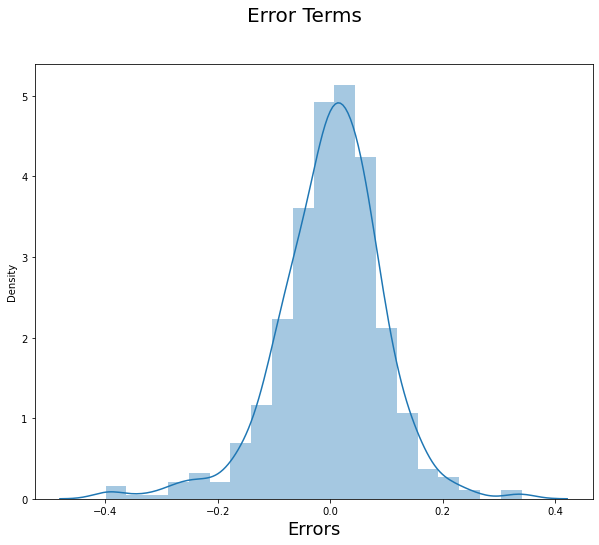

In [2377]:
#plotting a histogram with errors on X-axis and density on Y-axis
fig = plt.figure(figsize=(10,8)) #setting the figure size

sns.distplot((y_train['cnt'] - y_train_cnt), bins = 20) #plotting a distribution plot

fig.suptitle('Error Terms', fontsize = 20)   #setting the Error Terms             
plt.xlabel('Errors', fontsize = 18)           

Text(0.5, 0, 'Errors')

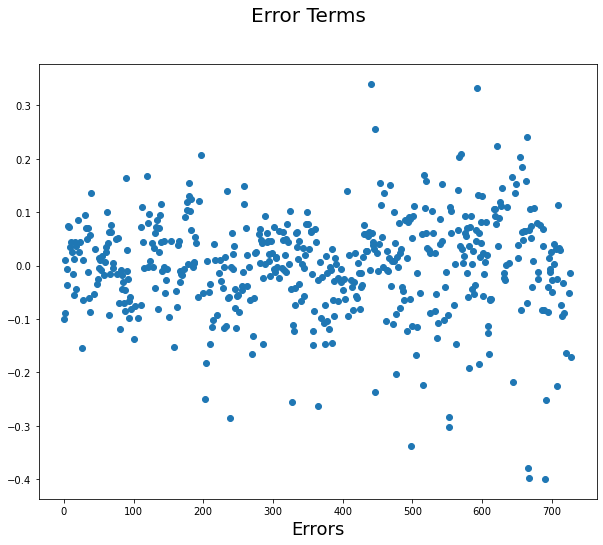

In [2378]:
#plotting a scatterplot with the residuals to check the randomness
fig = plt.figure(figsize=(10,8)) #setting the figure size
plt.scatter(y_train.index,(y_train['cnt']-y_train_cnt)) #Plotting scatter plot with the residuals
fig.suptitle('Error Terms', fontsize = 20)        
plt.xlabel('Errors', fontsize = 18)           

### Observations :

* The errors are normally distributed around zero
* The errors are random and show not trend or dependency
* The errors are nearly homoscedastic.

# Step 7: Making Predictions

### Scaling the Test Set

In [2379]:
# Applying scaler to all the columns in the 'Test Data' except for 
#'yes-no' and 'dummy' types as they are already within the range of 0 and 1 inclusive

#capturing the numeric variables from 34 variables
numeric_vars = ['atemp','hum','windspeed','cnt']

#just applying the transform method on the scaler object obtained during rescaling the train data
df_test[numeric_vars] = scaler.transform(df_test[numeric_vars])

df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,fall,spring,summer,...,Jul,Jun,Mar,May,Nov,Oct,Sep,bad,moderate,pleasant
184,0,1,0,0.769660,0.657364,0.084219,0.692706,1,0,0,...,1,0,0,0,0,0,0,0,1,0
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,0,1,...,0,1,0,0,0,0,0,0,0,1
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.795343,0.437098,0.339570,0.547400,1,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,0,1,...,0,1,0,0,0,0,0,0,0,1


### Dividing into X_test and y_test

In [2380]:
#removing target variable 'cnt' and assigning it to y_test
y_test = df_test.pop('cnt')

#assigning the remaining dataset to X_test
X_test = df_test

In [2381]:
# Keeping only those columns in the X_test which we got in the X_train_final
X_train_temp=X_train_final.drop(['const'],axis=1)
X_test = X_test[X_train_temp.columns]


In [2382]:
#adding constant to X_test

X_test = sm.add_constant(X_test)

In [2383]:
#predicting y value from X_test
y_pred = model.predict(X_test)

# 8: Model Evaluation 

In [2384]:
# comparing the r-squared of train and test data
print(r2_score(y_test,y_pred))
print(r2_score(y_train,y_train_cnt))
print(r2_score(y_train,y_train_cnt)-r2_score(y_test,y_pred))

0.7923257919867839
0.8243673195248529
0.03204152753806899


**The difference is around 3.2% which is not to hight and is a good model**

Text(0.5, 0, 'Errors')

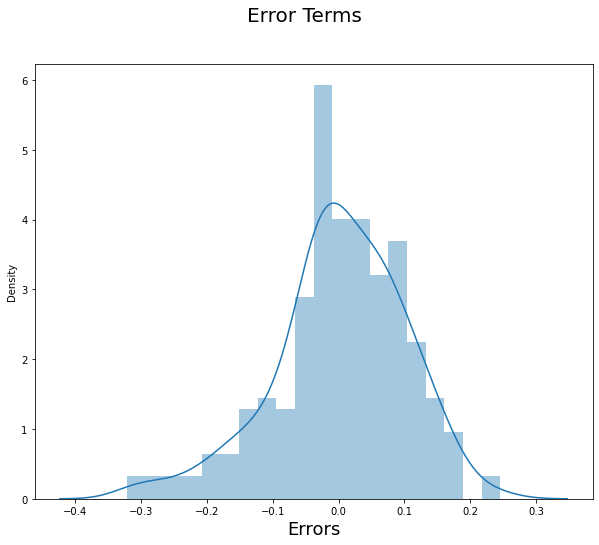

In [2385]:
#plotting a histogram with errors on X-axis and density on Y-axis
fig = plt.figure(figsize=(10,8)) #setting the figure size

sns.distplot((y_test - y_pred), bins = 20) #plotting a distribution plot

fig.suptitle('Error Terms', fontsize = 20)   #setting the Error Terms             
plt.xlabel('Errors', fontsize = 18)           

Text(0.5, 0, 'Errors')

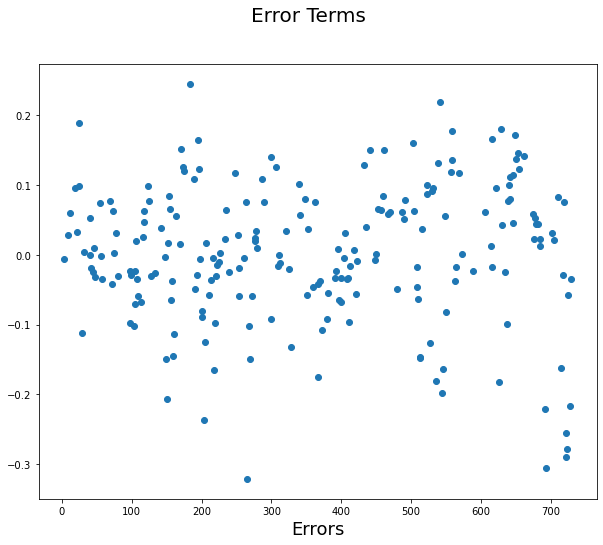

In [2386]:
#plotting a scatterplot with the residuals to check the randomness

fig = plt.figure(figsize=(10,8)) #setting the figure size
plt.scatter(y_test.index,(y_test-y_pred)) #Plotting scatter plot with the residuals
fig.suptitle('Error Terms', fontsize = 20)        
plt.xlabel('Errors', fontsize = 18)           

Text(0, 0.5, 'y_pred')

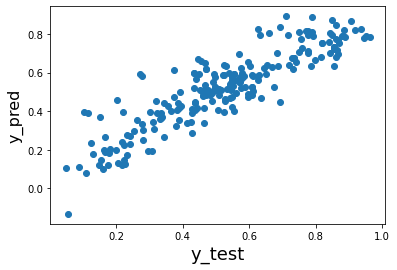

In [2387]:
# Plotting y_test and y_pred to understand the spread.
figJ = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### Observations : 

* The errors in case of test data are also normally distributed around the mean 0.
* The errors are random and show no trend or dependency.
* The errors are nearly homoscedastic.
* The y_pred and y_test are pretty close.


We can see that the equation of our best fitted line is:

### $ cnt = 0.2337  \times  yr + 0.5412  \times  atemp - 0.1334 \times windspeed + 0.1005 \times summer + 0.1302 \times winter + 0.0694 \times Aug + 0.1180 \times Sep - 0.1912 \times badweather + 0.0807 \times pleasantweather + 0.0419 $


### The top variables which are significant in our model are :

1. year
2. atemp
3. windspeed
4. summer
5. winter
6. Aug
7. Sep
8.  badweather
9. pleasantweather